# PREPARATION

## import librairies

In [1]:
# Indispensables
import pandas as pd
import numpy as np
#import geopandas as gpd
#import math

# general
import os
from os import listdir
#from os.path import isfile, join
#from os import walk
import sys
import io
import glob
import platform
#
print(os.name, "\n", platform.system(), "\n", platform.release())
#
import argparse
#from datetime import datetime
#import h5py
#import importlib

# VISU
import seaborn as sns
import matplotlib.pyplot as plt
#import matplotlib.colors as mcolors
#from matplotlib.colors import LogNorm

# IMAGES
#from IPython.display import Image, IFrame
#from PIL import Image
#import rasterio
import imageio

import colorsys

print('Panda version: %s' % pd.__version__)
print('Numpy version: %s' % np.__version__)
#print('Geo Panda version: %s' % gpd.__version__)

%matplotlib inline

nt 
 Windows 
 8.1
Panda version: 0.25.1
Numpy version: 1.16.5


In [292]:
from __future__ import print_function

# Machine Lerning
import tensorflow as tf
import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation     #LSTM
from keras.layers import Conv1D, Conv2D, MaxPooling2D
from keras import backend as K
from keras.callbacks import History

from keras.optimizers import SGD
from keras.regularizers import l2

print('TensorFlow: %s' % tf.__version__)
print('Keras: %s' % keras.__version__)

TensorFlow: 2.0.0
Keras: 2.3.1


## Déclaration des directories et variables

In [5]:
BASE_DIR = os.getcwd()

separe = "/"
# Laptop
if platform.system() == 'Darwin' and platform.release() == '18.7.0':
    DATA_DIR  = "/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DATA1/"
    DATA_DIR2 = "/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DATA2/"
    DATA_DIR3 = "/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/"
# sur IMAC
else:   #if platform.system() == 'Darwin' and platform.release() == '18.0.0':
    DATA_DIR  = "/Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/DATA1/"
    DATA_DIR2 = "/Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/DATA2/"
    DATA_DIR3 = "/Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/"
## Eurométropole
if platform.system() == 'Windows':
    DATA_DIR  = "S:\\Commun\\SIG3D\\2020\\PROJETS_2020\\20039_MachineLearning\\DATA\\"
    DATA_DIR2 = "S:\\Commun\\SIG3D\\2020\\PROJETS_2020\\20039_MachineLearning\\DATA2\\"
    DATA_DIR3 = "C:\\Users\\STG3841\\Mes Documents (local)\\travail\\"
    separe = "\\"   
    
DALLE_NUM = DATA_DIR + "DallesNumPoints5m" + separe
DALLE_ECA = DATA_DIR + "DallesEcartZ5m" + separe
DALLE_POS = DATA_DIR + "DallesPosition5m" + separe
print("Working directory:",BASE_DIR)
print("Data ROOT directory:",DATA_DIR)

sys.path.append(DATA_DIR)
sys.path.append(os.path.join(DATA_DIR,'DallesNumPoints5m\\'))
sys.path

Working directory: C:\Users\STG3841\Mes Documents (local)\travail
Data ROOT directory: S:\Commun\SIG3D\2020\PROJETS_2020\20039_MachineLearning\DATA\


['C:\\Users\\STG3841\\Mes Documents (local)\\travail',
 'C:\\Users\\STG3841\\AppData\\Local\\Continuum\\anaconda3\\python37.zip',
 'C:\\Users\\STG3841\\AppData\\Local\\Continuum\\anaconda3\\DLLs',
 'C:\\Users\\STG3841\\AppData\\Local\\Continuum\\anaconda3\\lib',
 'C:\\Users\\STG3841\\AppData\\Local\\Continuum\\anaconda3',
 '',
 'C:\\Users\\STG3841\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages',
 'C:\\Users\\STG3841\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\STG3841\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\STG3841\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\STG3841\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\STG3841\\.ipython',
 'S:\\Commun\\SIG3D\\2020\\PROJETS_2020\\20039_MachineLearning\\DATA\\',
 'S:\\Commun\\SIG3D\\2020\\PROJETS_2020\\20039_MachineLearning\\DATA\\DallesNumPoints5m\\']

## création des listes d'images

In [6]:
#liste1 = [f for f in listdir(DALLE_NUM) if isfile(join(DALLE_NUM, f))]
liste_1 = [f for f in glob.glob(DALLE_NUM + separe + "*.tif", recursive=True)]#   #only first N for test
liste_2 = [f for f in glob.glob(DALLE_ECA + separe + "*.tif", recursive=True)]#
liste_3 = [f for f in glob.glob(DALLE_POS + separe + "*.tif", recursive=True)]#
print(len(listdir(DALLE_NUM)), len(liste_1), len(liste_2), len(liste_3))

liste_NUM = os.listdir(DALLE_NUM)
liste_ECA = os.listdir(DALLE_ECA)
liste_POS = os.listdir(DALLE_POS)
print(len(liste_NUM), len(liste_ECA), len(liste_POS))

58776 29384 29384 29384
58776 58775 58768


# DONNEES

## TEST:  Lecture des images

## lecture/creation fichier/dataframe lampes des lampadaires présents dans la dalle 1x1 km

In [7]:
# Intialisation des variables de la dalle
fich_lamp  = DATA_DIR  + "LampadairePresence_0_1_5m.asc"
fich_lamp2 = DATA_DIR2 + "listepositif.xlsx"

header = pd.read_csv(fich_lamp, sep=" ", header=None, skiprows=0, nrows=5, names=["noms","valeurs"])
n_row =  header['valeurs'][0]
n_col =  header['valeurs'][1]
xlow = header['valeurs'][2]
ylow = header['valeurs'][3]
cell_size = header['valeurs'][4]
print("Bord inférieur gauche:", xlow, ylow, n_row, n_col, cell_size)

lampadaires = pd.read_csv(fich_lamp, sep=" ", header=None, skiprows=6)
print(lampadaires.sum().head(5))
print(lampadaires.nunique().agg(['mean','count','sum']))
##################################
# reconstruit le tableau dans le bon schéma usuel
# calcule la transposee
lampadaires = lampadaires.T
# inversion des colonnes (nombre pair de colonnes, mais pas nécessaire)
lampadaires = lampadaires[lampadaires.columns[::-1]]
##################################
lampes0 = pd.DataFrame(np.reshape(lampadaires.to_numpy(), n_row*n_col))

lampes2 = pd.read_excel(fich_lamp2, header=0, skiprows=0)
print(lampadaires.shape, lampes0.shape, lampes2.shape)
#print(lampadaires.describe())
print(lampadaires.sum().sum())
lampes2.head(5)

Bord inférieur gauche: 2042500 7272000 200 200 5
0    3.0
1    4.0
2    6.0
3    2.0
4    1.0
dtype: float64
mean       1.79
count    200.00
sum      358.00
dtype: float64
(200, 200) (40000, 1) (355, 5)
357.0


,_column,_row,_overlaps,posX,posY
0,0,80,1,2042502,7272402
1,0,92,1,2042502,7272462
2,0,102,1,2042502,7272512
3,0,106,1,2042502,7272532
4,0,169,1,2042502,7272847


## rempli le dataframe lampes0 et lampes1

In [8]:
lampes0['NumI'] = lampes0.index
lampes0['NumY'] = lampes0['NumI'].mod(other=n_col)
lampes0['NumX'] = ((lampes0['NumI'] - n_row + 1) / n_row).apply(np.ceil)
#lampes = lampes.drop(['Num'], axis=1)
lampes0.rename(columns={0: 'present'}, inplace=True)
lampes0 = lampes0.astype({'present': 'int8'}, copy=False)
lampes0 = lampes0.astype({'NumY': 'int32'}, copy=False)
lampes0 = lampes0.astype({'NumI': 'int32'}, copy=False)
lampes0 = lampes0.astype({'NumX': 'int32'}, copy=False)
print(lampes0.dtypes)
#print(lampes.describe(include='all'))
lampes0['X'] = xlow + lampes0['NumX'] * cell_size
lampes0['Y'] = ylow + lampes0['NumY'] * cell_size
lampes0['nom_NUM'] = lampes0['X'].map(str) + "_" + lampes0['Y'].map(str) +  "_NumPoints5m.tif"
lampes0['nom_ECA'] = lampes0['X'].map(str) + "_" + lampes0['Y'].map(str) + "_EcartZ5m.tif"
lampes0['nom_POS'] = lampes0['X'].map(str) + "_" + lampes0['Y'].map(str) +  "_Position5m.tif"
# extraction des lampadaires
lampes1 = lampes0[lampes0['present'] > 0]
print("Dalle:", lampes0.shape, "Nbre lampadaires:", lampes1.shape)
lampes0.head()

present     int8
NumI       int32
NumY       int32
NumX       int32
dtype: object
Dalle: (40000, 9) Nbre lampadaires: (357, 9)


,present,NumI,NumY,NumX,X,Y,nom_NUM,nom_ECA,nom_POS
0,0,0,0,0,2042500,7272000,2042500_7272000_NumPoints5m.tif,2042500_7272000_EcartZ5m.tif,2042500_7272000_Position5m.tif
1,0,1,1,0,2042500,7272005,2042500_7272005_NumPoints5m.tif,2042500_7272005_EcartZ5m.tif,2042500_7272005_Position5m.tif
2,0,2,2,0,2042500,7272010,2042500_7272010_NumPoints5m.tif,2042500_7272010_EcartZ5m.tif,2042500_7272010_Position5m.tif
3,0,3,3,0,2042500,7272015,2042500_7272015_NumPoints5m.tif,2042500_7272015_EcartZ5m.tif,2042500_7272015_Position5m.tif
4,0,4,4,0,2042500,7272020,2042500_7272020_NumPoints5m.tif,2042500_7272020_EcartZ5m.tif,2042500_7272020_Position5m.tif


In [9]:
lampes1.tail(8)

,present,NumI,NumY,NumX,X,Y,nom_NUM,nom_ECA,nom_POS
39336,1,39336,136,196,2043480,7272680,2043480_7272680_NumPoints5m.tif,2043480_7272680_EcartZ5m.tif,2043480_7272680_Position5m.tif
39384,1,39384,184,196,2043480,7272920,2043480_7272920_NumPoints5m.tif,2043480_7272920_EcartZ5m.tif,2043480_7272920_Position5m.tif
39520,1,39520,120,197,2043485,7272600,2043485_7272600_NumPoints5m.tif,2043485_7272600_EcartZ5m.tif,2043485_7272600_Position5m.tif
39570,1,39570,170,197,2043485,7272850,2043485_7272850_NumPoints5m.tif,2043485_7272850_EcartZ5m.tif,2043485_7272850_Position5m.tif
39577,1,39577,177,197,2043485,7272885,2043485_7272885_NumPoints5m.tif,2043485_7272885_EcartZ5m.tif,2043485_7272885_Position5m.tif
39685,1,39685,85,198,2043490,7272425,2043490_7272425_NumPoints5m.tif,2043490_7272425_EcartZ5m.tif,2043490_7272425_Position5m.tif
39756,1,39756,156,198,2043490,7272780,2043490_7272780_NumPoints5m.tif,2043490_7272780_EcartZ5m.tif,2043490_7272780_Position5m.tif
39763,1,39763,163,198,2043490,7272815,2043490_7272815_NumPoints5m.tif,2043490_7272815_EcartZ5m.tif,2043490_7272815_Position5m.tif


In [10]:
print(lampes1.shape, lampes0.shape)
lampes1.head(240).tail(20)


(357, 9) (40000, 9)


,present,NumI,NumY,NumX,X,Y,nom_NUM,nom_ECA,nom_POS
27731,1,27731,131,138,2043190,7272655,2043190_7272655_NumPoints5m.tif,2043190_7272655_EcartZ5m.tif,2043190_7272655_Position5m.tif
27747,1,27747,147,138,2043190,7272735,2043190_7272735_NumPoints5m.tif,2043190_7272735_EcartZ5m.tif,2043190_7272735_Position5m.tif
28103,1,28103,103,140,2043200,7272515,2043200_7272515_NumPoints5m.tif,2043200_7272515_EcartZ5m.tif,2043200_7272515_Position5m.tif
28125,1,28125,125,140,2043200,7272625,2043200_7272625_NumPoints5m.tif,2043200_7272625_EcartZ5m.tif,2043200_7272625_Position5m.tif
28131,1,28131,131,140,2043200,7272655,2043200_7272655_NumPoints5m.tif,2043200_7272655_EcartZ5m.tif,2043200_7272655_Position5m.tif
28193,1,28193,193,140,2043200,7272965,2043200_7272965_NumPoints5m.tif,2043200_7272965_EcartZ5m.tif,2043200_7272965_Position5m.tif
28256,1,28256,56,141,2043205,7272280,2043205_7272280_NumPoints5m.tif,2043205_7272280_EcartZ5m.tif,2043205_7272280_Position5m.tif
28393,1,28393,193,141,2043205,7272965,2043205_7272965_NumPoints5m.tif,2043205_7272965_EcartZ5m.tif,2043205_7272965_Position5m.tif
28463,1,28463,63,142,2043210,7272315,2043210_7272315_NumPoints5m.tif,2043210_7272315_EcartZ5m.tif,2043210_7272315_Position5m.tif
28464,1,28464,64,142,2043210,7272320,2043210_7272320_NumPoints5m.tif,2043210_7272320_EcartZ5m.tif,2043210_7272320_Position5m.tif


## Extraction de(s) image(s) dans un dataframe unique (à partir de imageio)

In [217]:
from keras.preprocessing.image import load_img, save_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img

off = 2000
NN = 0
NM = NN + off

dal1 = ['nom_NUM', 'nom_ECA', 'nom_POS']
dal2 = [DALLE_NUM, DALLE_ECA, DALLE_POS]
listes = [liste_1, liste_2, liste_3]
data = ['data1', 'data12', 'data3']
#### Pour eviter les fichiers manquants
# Compare les deux SETS (impossible avec des listes)
for m in range(1,4):
    print("M:", m)
    set_A = set(dal2[m-1] + lampes1[dal1[m-1]])
    set_B = set(listes[m-1])
    set_C1 = set_A & set_B
    set_C2 = set_B - set_A
    liste_C = list(set_C2)
    liste_extraite = list(liste_C[NN:NM]) + list(set_C1)
    #liste_extraite = list(set(list(liste_1[NN:NM]) + list(set_C1)))
    print(len(set_B), len(set_A), len(set_C1), len(set_C2), len(liste_1), len(liste_extraite))

    test = False
    if test:
    #  Ne fonctionne pas np.array(load_img(fname)) for fname in list_lamp0
        data[m-1] = np.array([np.array(imageio.imread(fname)) for fname in liste_extraite])
        data[m-1].shape
        fichier = DATA_DIR3 + "data_LAS_" + str(dal1[m-1]) + "_" + str(off) + ".npy"
        np.save(fichier, data[m-1])

    liste_y1 = [ 0 for x in range(len(liste_C[NN:NM]))]
    liste_y2 = [ 1 for x in range(len(list(set_C1)))]
    liste_y = liste_y1 + liste_y2
    print(len(liste_y1), len(liste_y2))
    len(liste_y)


M: 1
29384 357 352 29032 29384 2352
2000 352
M: 2
29384 357 352 29032 29384 2352
2000 352
M: 3
29384 357 352 29032 29384 2352
2000 352


### Lecture de TOUS les fichiers
5s pour 100 fichiers

~45mn ???    pour 40000 fichiers

### création de la table de 200-300 colonnes

# KERAS - TENSORFLOW

## Lecture du fichier de données

In [12]:
print(tf.keras.datasets)
if platform.system() == 'Darwin' and platform.release() == '18.0.0':
    df4 = pd.read_csv(DATA_DIR3 + "donnees_IMAC_LAS_1k_1k.csv")
else:
    df4 = pd.read_csv(DATA_DIR3 + "donnees_LAS_1k_1k.csv")
print(df4.shape)
df4.head()

<module 'tensorflow_core.keras.datasets' from 'C:\\Users\\STG3841\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\tensorflow_core\\python\\keras\\api\\_v2\\keras\\datasets\\__init__.py'>
(29736, 201)


,0_num,1_num,2_num,3_num,4_num,5_num,6_num,7_num,8_num,9_num,...,91_h,92_h,93_h,94_h,95_h,96_h,97_h,98_h,99_h,label
0,0,0,0,0,0,0,0,6,3,1,...,0.55,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0
1,0,0,0,0,4,3,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.3,0.0,0
2,1,2,1,1,0,1,0,0,0,0,...,0.00,0.00,0.00,0.67,0.17,0.58,0.0,0.0,0.0,0
3,0,0,0,0,0,0,0,0,0,0,...,0.17,0.35,0.77,0.00,0.00,0.00,0.0,0.0,0.0,0
4,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0


### Changement de la classe en categorial

In [273]:
from sklearn.model_selection import train_test_split 
from keras.utils import to_categorical

# Charge et split les données
X = df4.iloc[:,:-1]
y = df4.iloc[:,-1]
y_binary = to_categorical(y)

### Séparation Train - Test

In [274]:
train_data, test_data, train_labels, test_labels = train_test_split(
    X, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
#    X, y, test_size=0.2, random_state=42, stratify=y)

print(train_data.shape, train_labels.shape, test_data.shape, test_labels.shape, y_binary.shape, y.shape)

(23788, 200) (23788, 2) (5948, 200) (5948, 2) (29736, 2) (29736,)


## Création d'un Modèle Réseau de Neurone "SIMPLE"

In [275]:

Nomb_Input = 200
M = 64    # 512-256-128-64-32 ? 
epochs = 20
batch_size = 64
num_class = 2

# ou model = Sequential() + model.add(Dense(N)) + model.add(Dropout(0.5)) + model.add(Activation('softmax'))
model0 = Sequential([
    Dense(M, activation='relu', input_shape=(Nomb_Input,)),
    #Dropout(0.2),
    Dense(M, activation='relu'),
    Dense(M, activation='relu'), #model.add(Dropout(0.2))
    #Dropout(0.2),
#    Dense(num_class, activation='softmax')   #  ou sigmoid
    Dense(num_class, activation='sigmoid')  #, output_dim=1)
])

#    https://keras.io/losses 
#  loss fonctions: categorical_crossentropy, sparse_categorical_crossentropy, mean_squared_error ... etc
#  optimizer: 'sgd', 'adam', keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)


model0.compile(loss="binary_crossentropy", optimizer='adam',
    metrics=['msle', 'accuracy', 'mean_squared_error', 'binary_accuracy', 'categorical_accuracy'])
# NOT loss="categorical_crossentropy",'mean_squared_error'
# NOT optimizer='sgd' 
# NOT metrics=['accuracy', 'mse', 'acc', 'categorical_accuracy',
# 'sparse_categorical_accuracy', 'top_k_categorical_accuracy',
# 'sparse_top_k_categorical_accuracy', 'cosine_proximity', 'clone_metric','clone_metrics']
# ['binary_accuracy', 'fmeasure', 'precision', 'recall'])
# Print with verbose=2 ???
history0 = model0.fit(train_data, train_labels, validation_split=0.33, verbose=2, epochs=epochs, batch_size=batch_size)


Train on 15937 samples, validate on 7851 samples
Epoch 1/20
 - 1s - loss: 0.1765 - msle: 0.0177 - accuracy: 0.9733 - mean_squared_error: 0.0356 - binary_accuracy: 0.9733 - categorical_accuracy: 0.9743 - val_loss: 0.1206 - val_msle: 0.0113 - val_accuracy: 0.9773 - val_mean_squared_error: 0.0231 - val_binary_accuracy: 0.9773 - val_categorical_accuracy: 0.9773
Epoch 2/20
 - 1s - loss: 0.0992 - msle: 0.0106 - accuracy: 0.9758 - mean_squared_error: 0.0219 - binary_accuracy: 0.9758 - categorical_accuracy: 0.9758 - val_loss: 0.0986 - val_msle: 0.0101 - val_accuracy: 0.9774 - val_mean_squared_error: 0.0209 - val_binary_accuracy: 0.9774 - val_categorical_accuracy: 0.9773
Epoch 3/20
 - 1s - loss: 0.0781 - msle: 0.0091 - accuracy: 0.9767 - mean_squared_error: 0.0188 - binary_accuracy: 0.9767 - categorical_accuracy: 0.9768 - val_loss: 0.0894 - val_msle: 0.0097 - val_accuracy: 0.9783 - val_mean_squared_error: 0.0198 - val_binary_accuracy: 0.9783 - val_categorical_accuracy: 0.9782
Epoch 4/20
 - 1s -

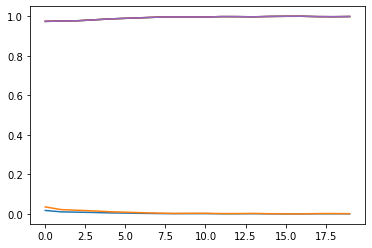

In [276]:
#history0.history
# plot metrics
_ = plt.plot(history0.history['msle'])
_ = plt.plot(history0.history['mean_squared_error'])
_ = plt.plot(history0.history['binary_accuracy'])
_ = plt.plot(history0.history['categorical_accuracy'])
_ = plt.plot(history0.history['accuracy'])
_ = plt.show()

In [277]:
model0.summary()

# model.save_weights('file.h5')

# avec le model construit + les poids
# model.load_weights('file.h5')


Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 64)                12864     
_________________________________________________________________
dense_85 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_86 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_87 (Dense)             (None, 2)                 130       
Total params: 21,314
Trainable params: 21,314
Non-trainable params: 0
_________________________________________________________________


### Figures

dict_keys(['val_loss', 'val_msle', 'val_accuracy', 'val_mean_squared_error', 'val_binary_accuracy', 'val_categorical_accuracy', 'loss', 'msle', 'accuracy', 'mean_squared_error', 'binary_accuracy', 'categorical_accuracy'])


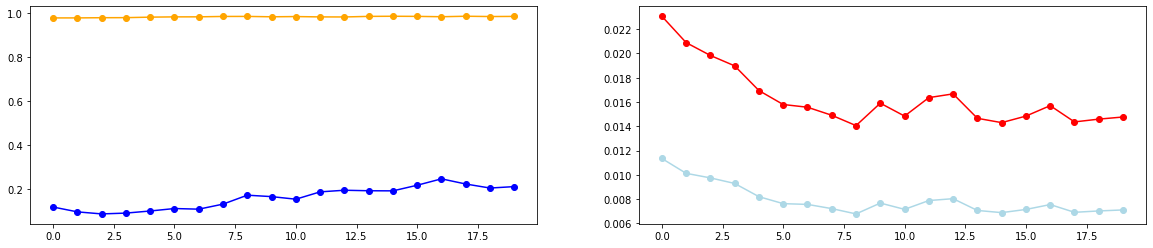

In [278]:
print(history0.history.keys())
coul = ["blue", "lightblue", "orange", "red"]

fig = plt.figure(figsize=(20,4))
_ = plt.subplot(1,2,1)
for i in range(0,4,2):
    _ = plt.plot(list(history0.history.values())[i],'k-o', color=coul[i])
_ = plt.subplot(1,2,2)
for j in range(1,4,2):
    _ = plt.plot(list(history0.history.values())[j],'k-o', color=coul[j])

In [279]:
print(history0.history.keys())
print(history0.history['val_accuracy'][-1])
print(history0.history['accuracy'][-1])
print(history0.history['val_loss'][-1])
print(history0.history['loss'][-1])


dict_keys(['val_loss', 'val_msle', 'val_accuracy', 'val_mean_squared_error', 'val_binary_accuracy', 'val_categorical_accuracy', 'loss', 'msle', 'accuracy', 'mean_squared_error', 'binary_accuracy', 'categorical_accuracy'])
0.9841421246528625
0.99811757
0.21307483083897577
0.006381850695727109


Test loss: 0.20139391534202672
Test accuracy: 0.007368432357907295
[0 0 0 0 0 0 0 0 0 0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


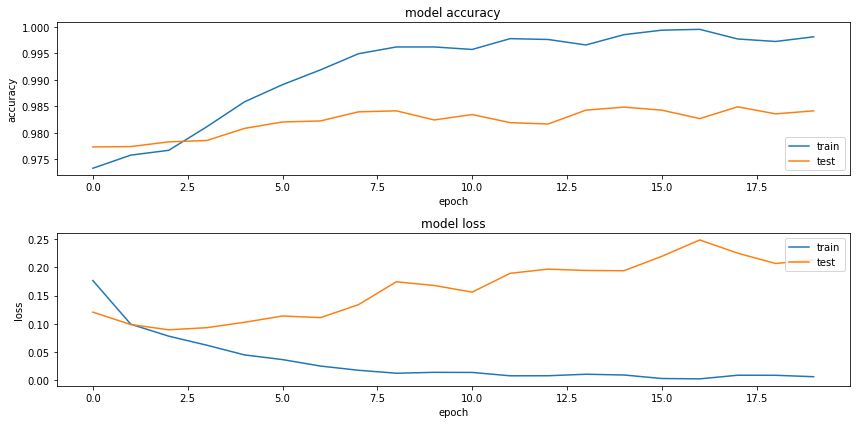

In [280]:
# RESULTATS
score = model0.evaluate(test_data, test_labels, verbose=0, batch_size=batch_size)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# predictions
classes = model0.predict(test_data, batch_size=batch_size)
predictions = model0.predict(test_data[:10])
print(np.argmax(predictions, axis=1))
print(test_labels[:10,1])

# PLOTS
fig = plt.figure(figsize=(12,6))
_ = plt.subplot(2,1,1)
_ = plt.plot(history0.history['accuracy'])
_ = plt.plot(history0.history['val_accuracy'])
_ = plt.title('model accuracy')
_ = plt.xlabel('epoch')
_ = plt.ylabel('accuracy')
_ = plt.legend(['train','test'], loc='lower right')

_ = plt.subplot(2,1,2)
_ = plt.plot(history0.history['loss'])
_ = plt.plot(history0.history['val_loss'])
_ = plt.title('model loss')
_ = plt.xlabel('epoch')
_ = plt.ylabel('loss')
_ = plt.legend(['train','test'], loc='upper right')

_ = plt.tight_layout()
_ = fig

### Matrice de Confusion

Echantillon Test: 5948
Echantillon Train: 23788
Prédit       0.0       1.0
Reel                      
0.0     0.993112  0.283688
1.0     0.010160  0.581560
Predit   0.0  1.0   All
Reel                   
0.0     5767   40  5807
1.0       59   82   141
All     5826  122  5948


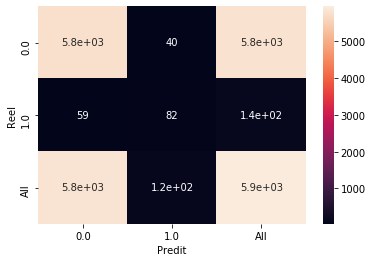

Predit       0.0       1.0  All
Reel                           
0.0     0.496556  0.003444  0.5
1.0     0.209220  0.290780  0.5
All     0.489744  0.010256  0.5


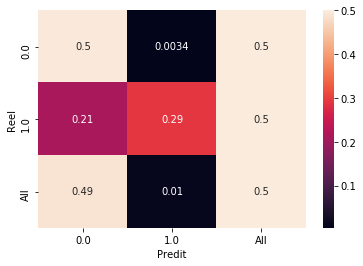

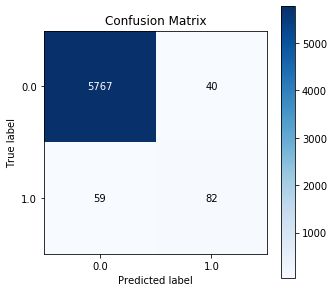

In [281]:
from sklearn.metrics import confusion_matrix
#       pip install scikit-plot
import scikitplot as skplt

# transforme les matrice en listes d'entiers binaires (0 ou 1)
Y11 = pd.DataFrame(model0.predict(test_data)[:,1:])[0].round(0).tolist()
Y10 = pd.DataFrame(test_labels[:,1:])[0].tolist()
print("Echantillon Test:", len(Y11))
confusion_matrix(Y11, Y10)

Y01 = pd.DataFrame(model0.predict(train_data)[:,1:])[0].round(0).tolist()
Y00 = pd.DataFrame(train_labels[:,1:])[0].tolist()
print("Echantillon Train:", len(Y01))
confusion_matrix(Y01, Y00)

y_reel = pd.Series(Y10, name='Reel')
y_pred = pd.Series(Y11, name='Prédit')

df_confusion = pd.crosstab(y_reel, y_pred)

df_conf_norm = df_confusion / df_confusion.sum(axis=1)
print(df_conf_norm)

df_confusion = pd.crosstab(y_reel, y_pred, rownames=['Reel'], colnames=['Predit'], margins=True)
print(df_confusion)
_ = sns.heatmap(df_confusion, annot=True)
plt.show()

df_conf_norm = df_confusion.div(df_confusion.sum(axis=1), axis=0)
print(df_conf_norm)
_ = sns.heatmap(df_conf_norm, annot=True)
plt.show()

######### NOT WORKING ???
#from pandas_ml import ConfusionMatrix
#confusion_matrix = ConfusionMatrix(y_reel, y_pred)
#confusion_matrix.plot()
#plt.show()
#confusion_matrix.plot(normalized=True)
#plt.show()

#binary_confusion_matrix = ConfusionMatrix(y_true, y_pred)
#print("Binary confusion matrix:\n%s" % binary_confusion_matrix)
#print(binary_confusion_matrix.TP) # TN, FP, FN, ...
#binary_confusion_matrix.plot(normalized=False)
#binary_confusion_matrix.plot(normalized=True, backend='seaborn')
#plt.show()
#confusion_matrix.print_stats()
#confusion_matrix.stats()
##########


skplt.metrics.plot_confusion_matrix(y_reel, y_pred, figsize=(5,5))

(5948, 4) (23788, 4)
(5807, 4) (141, 4) (23225, 4) (563, 4)
ERREURS: 0_true     0.0
0_pred     0.0
0_pred2    0.0
diff       0.0
dtype: float64 0_true      0.00000
0_pred     40.06582
0_pred2    49.00000
diff      -49.00000
dtype: float64 0_true     0.0
0_pred     0.0
0_pred2    0.0
diff       0.0
dtype: float64 0_true      0.000000
0_pred     26.064138
0_pred2     0.000000
diff        0.000000
dtype: float64
0.01765299260255548


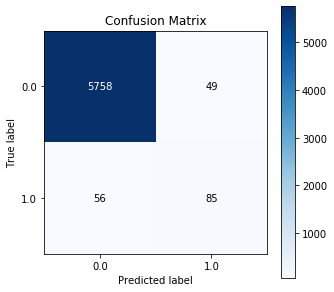

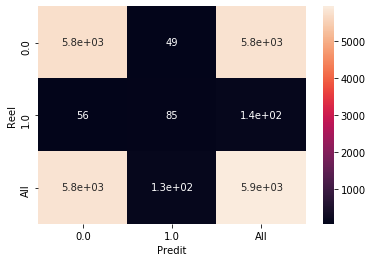

In [22]:
import scikitplot as skplt

def mse_loss(y_true, y_pred):
    # y_true and y_pred are numpy arrays of the same length.
    return ((y_true - y_pred) ** 2).mean()

def tab_result(df_a, df_b):
    # Extrait les matrices binaires en 1 seule colonne
    y_pred = pd.DataFrame(model0.predict(df_b)[:,1:])
    y_true = pd.DataFrame(df_a[:,1:])
    # création de la table
    dy = y_true.merge(y_pred, left_index=True, right_index=True, suffixes=('_true', '_pred'))
    dy['0_true'] = dy['0_true'].astype(int)
    dy['0_pred2'] = dy['0_pred'].round(0)   #arrondi à l'entier le + proche
    dy['diff'] = dy['0_true'] - dy['0_pred2']
    return dy

def lampe_results(df1, df2):
    df_10 = df1[df1['0_true'] == 0]
    df_11 = dy1[dy1['0_true'] == 1]
    df_20 = df2[df2['0_true'] == 0]
    df_21 = dy2[dy2['0_true'] == 1]
    return (df_10, df_11, df_20, df_21)

dy1 = tab_result(test_labels, test_data)
dy2 = tab_result(train_labels, train_data)
dy1.head(2)
dy2.head(2)
df_test_1, df_test_0, df_train_1, df_train_0 = lampe_results(dy1, dy2)

print(dy1.shape, dy2.shape)
print(df_test_1.shape, df_test_0.shape, df_train_1.shape, df_train_0.shape)
#print(df_test_0.describe())
true_pos1 = df_test_1[(df_test_1['0_pred2'] == 1) & (df_test_1['0_true'] == 1)].sum()
fals_pos1 = df_test_1[(df_test_1['0_pred2'] == 1) & (df_test_1['0_true'] == 0)].sum()
fals_neg1 = df_test_1[(df_test_1['0_pred2'] == 0) & (df_test_1['0_true'] == 1)].sum()
true_neg1 = df_test_1[(df_test_1['0_pred2'] == 0) & (df_test_1['0_true'] == 0)].sum()
print("ERREURS:", true_pos1, fals_pos1, fals_neg1, true_neg1)
#####################################
# sensitivity-recall : TPR = TP/P = TP / (TP + FN)
# specificity-select : TNR = TN/N = TN / (TN + FP)
# balance : = (TPR + TNR) / 2
# precision          : TP / (TP + FP)

# accuracy    : ACC = (TP + TN) / total
# FI score    :  2 * TP / (2 TP + FP + FN) == 2 / (1/precision + 1/recall)
#####################################


# calcul pour LOSS du Mean Squared Error
print(mse_loss(y_reel, y_pred))

_ = skplt.metrics.plot_confusion_matrix(y_reel, y_pred, figsize=(5,5))
plt.show()

confusion_matrix(dy1['0_true'], dy1['0_pred2'])
sns.heatmap(df_confusion, annot=True)
plt.show()

# KERAS :  images bi-dimensionelles

## Lecture du fichier de données

In [218]:
#off = 2000

fichier1  = DATA_DIR3 + "data_LAS_nom_NUM_" + str(off) + ".npy"
data1     = np.load(fichier1)
fichier2  = DATA_DIR3 + "data_LAS_nom_ECA_" + str(off) + ".npy"
data2     = np.load(fichier2)
print(type(data1), type(data2))
print(data1.shape, data2.shape)

# concatenation de NUM et POS
data = tf.concat([data1, data2], 2)
#data = data1
taille = data.shape[0]
print(taille)

fichierY = DATA_DIR3 + "data_LAS_nom_POS_" + str(off) + ".npy"
data_y = np.load(fichierY).reshape(taille,100)

print("Fichiers utilisés:\n", fichier1, " et\n", fichier2, "\n", data.shape)
print("Classification utiliseé:\n", fichierY, "\n", data_y.shape)

Nomb_Input = data.shape

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(2352, 10, 10) (2352, 10, 10)
2352
Fichiers utilisés:
 C:\Users\STG3841\Mes Documents (local)\travail\data_LAS_nom_NUM_2000.npy  et
 C:\Users\STG3841\Mes Documents (local)\travail\data_LAS_nom_ECA_2000.npy 
 (2352, 10, 20)
Classification utiliseé:
 C:\Users\STG3841\Mes Documents (local)\travail\data_LAS_nom_POS_2000.npy 
 (2352, 100)


### tests

In [219]:
print(data.shape)
df = pd.DataFrame(tf.reshape(data, [data.shape[0],data.shape[1]*data.shape[2]]))
#df = pd.DataFrame(tf.reshape(data, [552,200]))
print(df.shape)
# sns.pairplot(df)
# sns.heatmap(df.coor(), annot=True)
df.head()
data[118:120,:2,0:]

(2352, 10, 20)
(2352, 200)


<tf.Tensor: id=4044712, shape=(2, 2, 20), dtype=float64, numpy=
array([[[2.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.26      ,
         0.        , 1.86      , 0.        , 0.        , 2.01000001],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.18      , 0.39      , 0.05      , 1.77      , 1.53999999,
         1.76      , 0.        , 0.        , 0.        , 1.65      ]],

       [[1.        , 0.        , 0.        , 0.        , 5.        ,
         3.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.03      , 0.        , 0.        ,
         0.04      , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 1.        , 2.        ,
         0.        , 0.        , 0

### Séparation Train - Test 

In [288]:
from sklearn.model_selection import train_test_split 
from keras.utils import to_categorical

# Charge et split les données
X = data
X = data1
print("Dimensions X:", X.shape)
##############################################
###  Passage mode binaire à une liste de 100
y = liste_y
y_binary = to_categorical(y)
print("Dimensions Y:", y_binary.shape, len(y))
#
# y = data_y
# print(y.shape)
#############################

train_data, test_data, train_labels, test_labels = train_test_split(
    X, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
#    X, y, test_size=0.2, random_state=42, stratify=y)

#print(train_data.shape, train_labels.shape, test_data.shape, test_labels.shape)
print("Train et Test:", train_data.shape, len(train_labels), test_data.shape, len(test_labels))

#train_data = np.expand_dims(train_data, axis=3)
#test_data = np.expand_dims(test_data, axis=3)

train_data = train_data.reshape(train_data.shape[0], 10, 10, 1)
test_data  = test_data.reshape(test_data.shape[0], 10, 10, 1)

#print(train_data.shape, train_labels.shape, test_data.shape, test_labels.shape)
print(train_data.shape, len(train_labels), test_data.shape, len(test_labels))


Dimensions X: (2352, 10, 10)
Dimensions Y: (2352, 2) 2352
Train et Test: (1881, 10, 10) 1881 (471, 10, 10) 471
(1881, 10, 10, 1) 1881 (471, 10, 10, 1) 471


## Modèles CNN 2D

In [294]:
# 0)Trains a simplet CONVNET on the MNIST dataset

input_shape = (10, 10, 1)     #input_shape = (10, 10, 2)
num_classes = 2
epochs = 15
batch_sise=len(test_labels)/10
activ1  = "relu"
activ2  = "sigmoid"
activ2b = "softmax"

from sklearn.utils import class_weight
ratio = 401 / 70
poids_class = {0: 1., 1: ratio}
#poids_class = class_weight.compute_class_weight(np.unique(train_labels), train_labels, y=? [0,1])

model2 = Sequential()
model2.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", strides=(1,1), 
                  activation=activ1, kernel_regularizer = "l2", input_shape=input_shape))
model2.add(Conv2D(32, (3, 3), padding="same", strides=(1,1), activation=activ1, kernel_regularizer = "l2"))
# , kernel_regularizer = l2 (0.0005)

#model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(1/4))

model2.add(Conv2D(64, (3, 3), padding="same", strides=(1,1), activation=activ1, kernel_regularizer = "l2"))
model2.add(Conv2D(64, (3, 3), padding="same", strides=(1,1), activation=activ1, kernel_regularizer = "l2"))
#model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(1/4))

model2.add(Flatten())
model2.add(Dense(128, activation=activ1))
model2.add(Dropout(0.5))
model2.add(Dense(num_classes, activation=activ2))

# optimizerA  sgd=SGD(lr=1e-5, decay=1e-6, momentum=0.9, nesterov=True)
# optimizerB  adam=Adam(lr=1e-3, beta_1=0.9, beta_2=0.999, epsilon=1e-8, decay=0.0)
#optim = keras.optimizers.Adadelta()
optim = SGD(lr=1e-4, decay=1e-6, momentum=0.9, nesterov=True)
# bianry or categorical

model2.compile(loss=keras.losses.binary_crossentropy, optimizer=optim, metrics=['accuracy'])

# poids_class, 'balanced', 'balanced_subsample'
history2 = model2.fit(train_data, train_labels, batch_size=batch_size, epochs=epochs,
            class_weight='balanced',
            verbose=1, validation_data=(test_data, test_labels))

score = model2.evaluate(test_data, test_labels, batch_size=batch_size, verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 1881 samples, validate on 471 samples
Epoch 1/15
1881/1881 [==============================] - 3s 2ms/step - loss: 0.9871 - accuracy: 0.6839 - val_loss: 0.9834 - val_accuracy: 0.8333
Epoch 2/15
1881/1881 [==============================] - 3s 1ms/step - loss: 0.9772 - accuracy: 0.7480 - val_loss: 0.9725 - val_accuracy: 0.8493
Epoch 3/15
1881/1881 [==============================] - 3s 1ms/step - loss: 0.9650 - accuracy: 0.7990 - val_loss: 0.9608 - val_accuracy: 0.8514
Epoch 4/15
1881/1881 [==============================] - 3s 1ms/step - loss: 0.9519 - accuracy: 0.8195 - val_loss: 0.9478 - val_accuracy: 0.8514
Epoch 5/15
1881/1881 [==============================] - 3s 1ms/step - loss: 0.9411 - accuracy: 0.8331 - val_loss: 0.9330 - val_accuracy: 0.8514
Epoch 6/15
1881/1881 [==============================] - 3s 1ms/step - loss: 0.9249 - accuracy: 0.8434 - val_loss: 0.9173 - val_accuracy: 0.8514
Epoch 7/15
1881/1881 [==============================] - 3s 1ms/step - loss: 0.9085 - accu

### Sommaire

In [295]:
model2.summary()

# model.save_weights('file.h5')
# avec le model construit + les poids
# model.load_weights('file.h5')

Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_167 (Conv2D)          (None, 10, 10, 32)        320       
_________________________________________________________________
conv2d_168 (Conv2D)          (None, 10, 10, 32)        9248      
_________________________________________________________________
dropout_117 (Dropout)        (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_169 (Conv2D)          (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_170 (Conv2D)          (None, 10, 10, 64)        36928     
_________________________________________________________________
dropout_118 (Dropout)        (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_47 (Flatten)         (None, 6400)            

### Figures

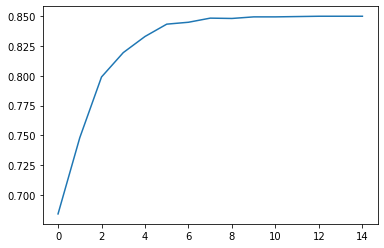

In [296]:
#history0.history
# plot metrics
#_ = plt.plot(history2.history['binary_accuracy'])
_ = plt.plot(history2.history['accuracy'])
_ = plt.show()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


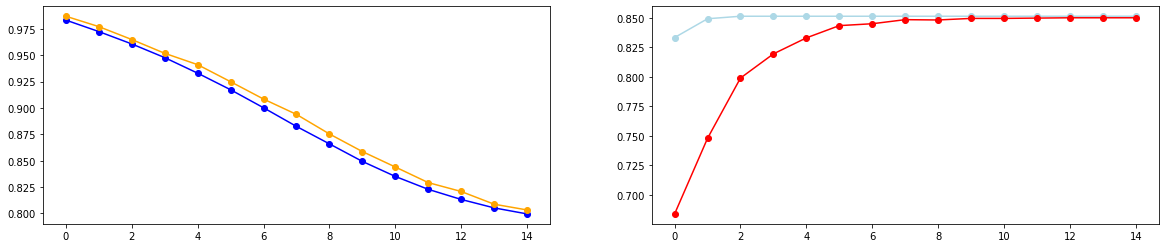

In [297]:
print(history2.history.keys())
coul = ["blue", "lightblue", "orange", "red"]

fig = plt.figure(figsize=(20,4))
_ = plt.subplot(1,2,1)
for i in range(0,4,2):
    _ = plt.plot(list(history2.history.values())[i],'k-o', color=coul[i])
_ = plt.subplot(1,2,2)
for j in range(1,4,2):
    _ = plt.plot(list(history2.history.values())[j],'k-o', color=coul[j])

Test loss: 0.7994721383805488
Test accuracy: 0.8513800501823425
[0 0 0 0 0 0 0 0 0 0]
[1. 1. 1. 1. 1. 1. 0. 1. 1. 1.]


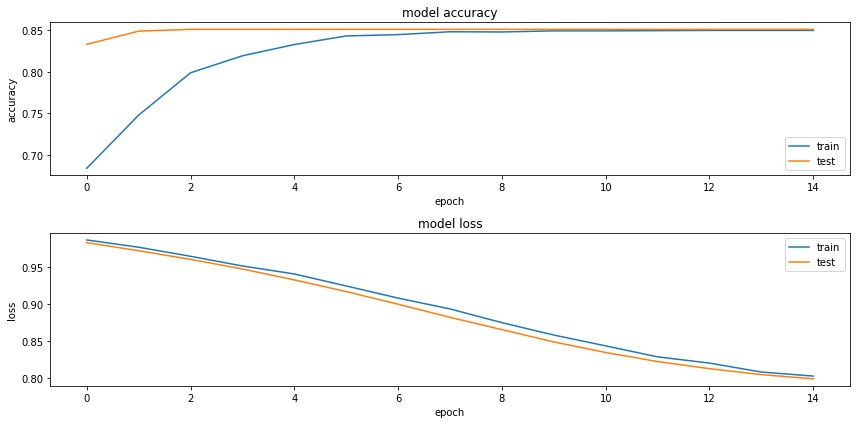

In [298]:
# RESULTATS
score = model2.evaluate(test_data, test_labels, verbose=0, batch_size=batch_size)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# predictions
classes = model2.predict(test_data, batch_size=batch_size)
predictions = model2.predict(test_data[:10])
#predictions = model2.predict_classes(test_data[:10])
print(np.argmax(predictions, axis=1))
print(test_labels[:10,0])

# PLOTS
fig = plt.figure(figsize=(12,6))
_ = plt.subplot(2,1,1)
_ = plt.plot(history2.history['accuracy'])
_ = plt.plot(history2.history['val_accuracy'])
_ = plt.title('model accuracy')
_ = plt.xlabel('epoch')
_ = plt.ylabel('accuracy')
_ = plt.legend(['train','test'], loc='lower right')

_ = plt.subplot(2,1,2)
_ = plt.plot(history2.history['loss'])
_ = plt.plot(history2.history['val_loss'])
_ = plt.title('model loss')
_ = plt.xlabel('epoch')
_ = plt.ylabel('loss')
_ = plt.legend(['train','test'], loc='upper right')

_ = plt.tight_layout()
_ = fig

### Matrice de confusion

Echantillon Train: 1881
Echantillon Test: 471

 Predit  0.0  All
Reel            
0.0     401  401
1.0      70   70
All     471  471


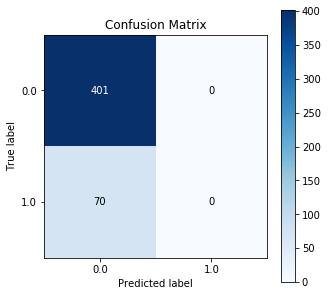


            0.0  1.0      All
Reel                        
0.0   0.500000  NaN  0.42569
1.0   0.087282  NaN  0.07431
All   0.587282  NaN  0.50000

 Predit  0.0  All
Reel            
0.0     0.5  0.5
1.0     0.5  0.5
All     0.5  0.5


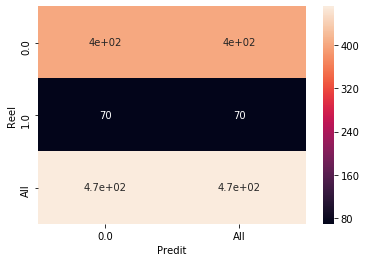

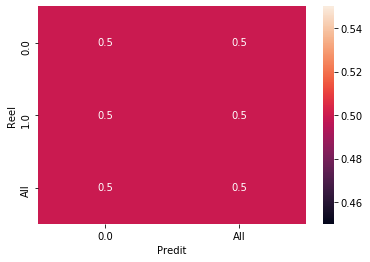

In [299]:
from sklearn.metrics import confusion_matrix
#       pip install scikit-plot
import scikitplot as skplt

# transforme les matrice en listes d'entiers binaires (0 ou 1)
Y01 = pd.DataFrame(model2.predict(train_data)[:,1:])[0].round(0).tolist()
Y00 = pd.DataFrame(train_labels[:,1:])[0].tolist()
print("Echantillon Train:", len(Y01))
#confusion_matrix(Y01, Y00)

Y11 = pd.DataFrame(model2.predict(test_data)[:,1:])[0].round(0).tolist()
Y10 = pd.DataFrame(test_labels[:,1:])[0].tolist()
print("Echantillon Test:", len(Y11))
#confusion_matrix(Y11, Y10)

y_reel = pd.Series(Y10, name='Reel')
y_pred = pd.Series(Y11, name='Prédit')
df_confusion = pd.crosstab(y_reel, y_pred, rownames=['Reel'], colnames=['Predit'], margins=True)
print("\n", df_confusion)
#
skplt.metrics.plot_confusion_matrix(y_reel, y_pred, figsize=(5,5))
plt.show()
#
df_conf_norm = df_confusion / df_confusion.sum(axis=1)
print("\n", df_conf_norm)
df_conf_norm = df_confusion.div(df_confusion.sum(axis=1), axis=0)
print("\n", df_conf_norm)

_ = sns.heatmap(df_confusion, annot=True)
plt.show()
_ = sns.heatmap(df_conf_norm, annot=True)
plt.show()

# KERAS hyperparametres

In [301]:
from sklearn.model_selection import GridSearchCV

from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor

def create_model(neurons=1, optimizer='adam', dropout_rate=0.0, learn_rate=0.01, momentum=0, 
                 init_mode='uniform', activation='relu', dropout_rate=0.0, weight_constraint=0):
    # create model
    model = Sequential()
    model.add(Dense(neurons, kernel_initializer=init_mode, input_dim=8, activation=activation)'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid'))
    # Compile model
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# fix random seed for reproducibility
seed = 42
numpy.random.seed(seed)
# load dataset

dataset = 
# split into input (X) and output (Y) variables
X = dataset
Y = dataset

# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, dropout_rate=0.2, verbose=0)

              
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
weight_constraint = [i for i in range (1, 6, 1)]
dropout_rate = [i/10 for i in range (0, 10, 1)]
neurons = [1, 5, 10, 15, 20, 25, 30]

param_grid = dict(neurons=neurons, learn_rate=learn_rate, momentum=momentum, optimizer=optimizer, 
                init_mode=init_mode, batch_size=batch_size, epochs=epochs, activation=activation,
                dropout_rate=dropout_rate, weight_constraint=weight_constraint)
#  score = ???
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)   # n_jobs=-1  parallisation
grid_result = grid.fit(X, Y)

# summarize results ==>  best_score et best_params_
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

SyntaxError: invalid syntax (<ipython-input-301-ded477e1019e>, line 19)